# Black Scholes

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Weiner Process/ standard Brownian Motion

[source](https://www.quantstart.com/articles/Brownian-Motion-and-the-Wiener-Process/)

We've previously thought of brownian motion as a series of coin tosses. This is discrete and Markovian, which we don't want in our SDEs.

Let's define a continous model.

Normal coin toss
$$ Z_i \in \{-1, 1\} $$

Modified coin toss
$$ Z_i \in \{-\sqrt{T/N}, \sqrt{T/N}\} $$
Where $T$ is time interval and $N$ is the number of coin tosses during that interval. By doing this we make our calculations easier later on.

$$ B_t = \sum^t_i Z_i $$

An important aspect to see is that when $N \rightarrow \infty$, the interval becomes continuous. It also the difference across any interval follows a Normal distribution (CLT).

When we defined it above, it makes our variance calculations really easy:
$$ \sum_{i=0}^N (B_i - B_{i-1})^2 = E[B(T)^2] = N \times \left( \sqrt{\frac{T}{N}} \right)^2 = T $$


So really just think of it as a lot of coin tosses of a very small quantity. added together.

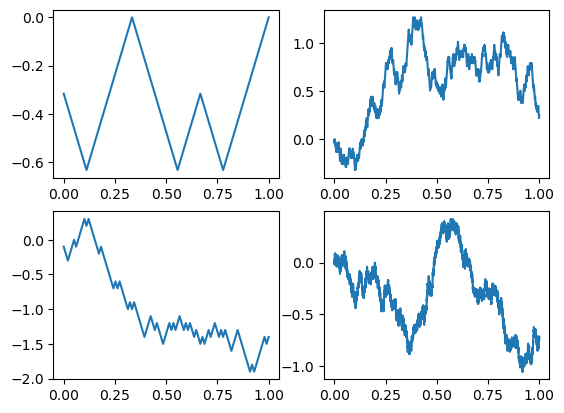

In [13]:
T = 1
N = np.array([10, 100, 1000, 10000])

fig, axs = plt.subplots(2,2)
mu = 0

for i, n in enumerate(N):
	x = np.linspace(0, T, n)
	y = np.cumsum(np.sqrt(T/n) * (2*np.random.binomial(n=1, p=0.5, size=n) - 1))
	axs[(i % 2, i // 2)].plot(x,y)


So an infinite number of atmoically small coin flips basically becomes a continous interval, but follows a Normal distribution because of the Central Limit Theorem.

Brownian Motion $B(t)$ is a sequence of random variables such that $B(t+\delta t) - B(t) \sim N(0, \delta t)$ and independent from other non-overlapping intervals
- Brownian motions are continuous everywhere and differentiable nowhere. Because we take a infinitely small step for $dt$, it is continous. But its not differentiable as these constitute of infinitely small corners. 
- Brownian motion shows a self-similarity of fractal geometry
- Are strongly normally distributed. So for $s<t, s, t\in[0, T] \Rightarrow B(t) - B(s) \sim N(0, t-s)$

### SDE

[source](https://www.quantstart.com/articles/Stochastic-Differential-Equations/)
[source](https://galton.uchicago.edu/~lalley/Courses/385/SDE.pdf)

Uses Ito calculus (aka calculus extended to stochastic processes)

Standard Brownian motion is limiting. We want to modify this "coin flip" esque experiment. Notably, we can modify it by defining $W(t)$, a new modified brownian motion.

$$ W(t) = \int_0^t f(s) dB(s) = \lim_{N\rightarrow \infty} \sum_k^{N} f(t_k) (B(t_k) - B(t_{k-1})) $$

$$ dW = f(t) dB $$

by FTC.

We can define $W(t)$ that is useful in our model:

$$ dS_t = \mu S_t dt + \sigma S_t dB_t $$

$$ S(t) - S(0) = \int_0^T \mu S_t dt + \int_0^T \sigma S_t dB_t  $$

This mimicks the brownian motion we've showed before. Inaccurately shown below:

$$ S(t) - S(0) = \sum (\mu dt + \sigma dB_t) S_t $$

Think of $S_t$ as another infinitely small coin flip going up and down the value of $\mu dt + \sigma dB_t$



### Geometric Brownian motion

[source](https://www.quantstart.com/articles/Geometric-Brownian-Motion/)

$$ dS_t = S_t ( \mu dt + \sigma dW_t) $$

Where $S_t$ is asset price, $\mu$ is drift parameter, $\sigma$ is volatility, $dB_t$ is the weiner process/brownian motion

The analytical solution to this SDE is:

$$ S(t) = S(0) exp((\mu - \sigma^2/2 )t + \sigma dB(t))	 $$




### Options

Call options are the right to buy an asset valued at spot price $S$ at expiration date (or just future date) at a strike price $K$. You are projecting increase in stock value.
$$ C(S, t) = max(S-K, 0) $$

Put options are the right to sell. You are projecting decrease in stock value.
$$ P(S, t) = max(K-S, 0) $$


### Black Scholes

Assumptions:
- frictionless market. No fees for any transactions
- buy or sell any amount. fractions or large quantities.
- lend/borrow any amount at riskless rate (no default). fractions too
- no arbitrage. no riskless profits or price differences across markets.

Given by:

$$ \frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS \frac{\partial V}{\partial S} - rV = 0 $$
- t is time in years
- r is annual riskless interest rate, continously compounded ($e^{rt} = (1 + r/N)^{Nt} $)
- $S(t)$ is stock/asset price at $t$. aka spot price.
- $K$ is strike price set for the option. (exercise price).
- $\mu$ is drift parameter
- $\sigma$ is volatility parameter
- $V(S, t)$ price of option of asset $S$ at time $t$:
	- $C(S, t)$ price of call option
	- $P(S, t)$ price of put option
- $T$ is expiration time
- $\tau$ is the time till maturity $T-t$


#### Derivation

Heat equation:
$$ \frac{\partial V}{\partial t} = -k \frac{\partial^2 V}{\partial x^2} $$
Which is a variation of the continuity equation.

Here $x = S$ since the asset price is varying
$$ \frac{\partial V}{\partial t} = -k \frac{\partial^2 V}{\partial S^2} $$

If we assume no interest rate $r = 0$ and $k = \frac{1}{2} \sigma^2 S^2 $ we get the following:

$$ \frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} = 0 $$

Which is a subset of the Black Scholes equation:
$$ \frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS \frac{\partial V}{\partial S} - rV = 0 $$

### Solving it

Boundary conditions

$C(0, t) = 0, \quad \forall t$

$C(S, t) \rightarrow S-K, \quad S\rightarrow \infty $

$C(S, T) = max(S-K, 0)$

#### Black Formula ('76)
[source](https://en.wikipedia.org/wiki/Black_model)
[source](https://www.mathworks.com/help/symbolic/the-black-scholes-formula-for-call-option-price.html)

We can solve this to get (the way they solved this seems to be a bit illusive. I think you can use finite-difference methods or some analytical method I don't quite understand yet):

$$ C(S, t) = N(d_1) S_t - N(d_2) K e^{-rt}  $$
$$ d_1 = \frac{1}{\sigma \sqrt{T}} \left[ \log{S/K} + (r+\sigma^2/2) T \right]  $$
$$ d_2 = d_1 - \sigma \sqrt{T} $$
$$ N(d) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^d e^{-t^2/2} dt $$




In [15]:
from matplotlib.colors import LightSource
from matplotlib import cbook, cm

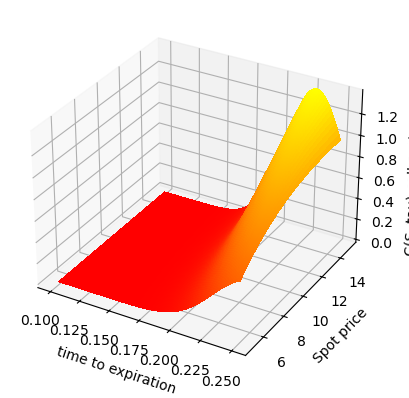

In [95]:
T = 0.25
r = 1
sigma = 1

N_tau = 100
N_S = 200

tau = np.linspace(0.1, T, N_tau)
S = np.linspace(5, 15, N_S)
K = 10

# C(S, tau) just following formula (plug n chug)
pv_k = K * np.exp(-r*tau)
d1 = np.tile(np.log(S/K), (N_tau, 1)).transpose(1, 0)
assert not np.any(np.isnan(d1)), " contains nan"
d1 += (r + sigma**2 / 2) * tau / (sigma * np.sqrt(tau))
assert not np.any(np.isnan(d1)), " contains nan"

d2 = d1 - sigma * np.sqrt(tau)

assert not np.any(np.isnan(d2)), " contains nan"

def Norm(d):
	resolution = 100
	x = np.linspace(-5, d, resolution)
	y = np.exp(-x**2 /2)
	return (1/np.sqrt(2*np.pi)) * np.trapz(y, x=x)

C = Norm(d1) * S
w = Norm(d2) * K + np.tile(pv_k, (N_S, 1)).transpose(1, 0)

tau, S = np.meshgrid(S, tau)
ax = plt.figure().add_subplot(projection='3d')

surf = ax.plot_surface(S, tau, C, cmap="autumn", cstride=1, rstride=1,
                       linewidth=0, antialiased=False, shade=True)

ax.set_zlabel("C(S, tau) call option valued")
ax.set_xlabel("time to expiration")
ax.set_ylabel("Spot price")
plt.show()

In [44]:
a = np.array([1, 2, 3])
b = np.array([[4, 5, 6], [1,2 ,3]])
np.add(a.reshape(3,), b)
np.tile(a, (1, 3))


array([[1, 2, 3, 1, 2, 3, 1, 2, 3]])

### Hedging strategy

[source](https://www.columbia.edu/~mh2078/FoundationsFE/BlackScholes.pdf)